In [2]:
import numpy as np
import matplotlib.pyplot as plt
#Running notes: for both algorithm implementations, calculation of actual values needs to be modified because you are using lists - it will concatentate. 

In [3]:
#Problem 3 -- 

(51,)
(51,)
(51,)
(51,)
(51,)
(51,)
(51,)
(51,)
(51,)


/var/folders/nl/0bb67wk963d9sfmf9bt_88gr0000gn/T/ipykernel_86892/169778502.py:83: RuntimeWarning: overflow encountered in scalar multiply
  return -S * beta_rate*I + gamma*I #rate of new infections
/var/folders/nl/0bb67wk963d9sfmf9bt_88gr0000gn/T/ipykernel_86892/169778502.py:86: RuntimeWarning: overflow encountered in scalar multiply
  return S * beta_rate*I - gamma*I
/var/folders/nl/0bb67wk963d9sfmf9bt_88gr0000gn/T/ipykernel_86892/169778502.py:83: RuntimeWarning: invalid value encountered in scalar add
  return -S * beta_rate*I + gamma*I #rate of new infections
/var/folders/nl/0bb67wk963d9sfmf9bt_88gr0000gn/T/ipykernel_86892/169778502.py:86: RuntimeWarning: invalid value encountered in scalar subtract
  return S * beta_rate*I - gamma*I


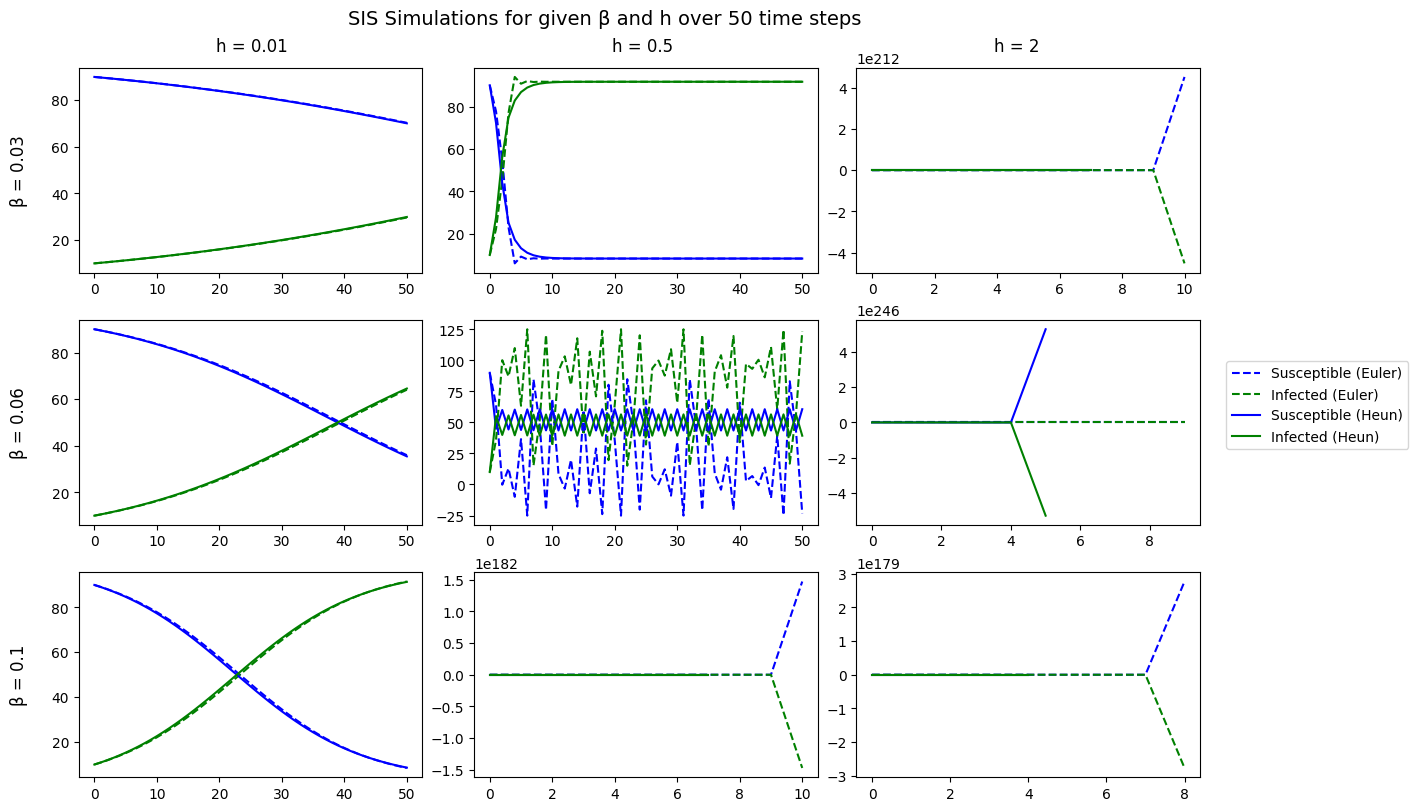

In [4]:

#Problem #4 - SIS numeric solve
def euler_integrate(odes, init_state_vector, h, sim_length):
    """ 
    Parameters:
    odes: an ordered list of functions accepting a time and a state vector, which represent ordinary differential equations that describing the state variables of a dynamical system in continuous time.
    init_state_vector: an ndarray containing the initial conditions, with variables ordered the same way as the odes
    h: discrete timestep over which the system should be evaluated (in some uniform time unit)
    Returns:
    simulated_values: A nested list of arrays containing the state of each variable at each timestep, in the order that they were given.
    """
    #Calculate the timesteps over the whole length of the simulation
    time_window = np.arange(0, sim_length, h)
    #Initialize output list with initial conditions
    simulated_values = [init_state_vector]
    #get the list of states from the last time step
    y=simulated_values[-1]
    #Process one step at a time
    for t in range(sim_length):
    #for t in time_window:
        #get the list of states from the last time step
        y=simulated_values[-1]
        #Process each ODE
        slopes = np.array([eq(t, y) for eq in odes])
        #Update the states: dd the current state to the record
        simulated_values.append(y + h*slopes)
    return simulated_values

def heun_integrate(odes, init_state_vector, h, sim_length):
    """ 
    Parameters:
    odes: an ordered list of functions accepting a time and a state vector, which represent ordinary differential equations that describing the state variables of a dynamical system in continuous time.
    init_state_vector: an ndarray containing the initial conditions, with variables ordered the same way as the odes
    h: discrete timestep over which the system should be evaluated (in some uniform time unit)
    Returns:
    simulated_values: A nested list of arrays containing the state of each variable at each timestep, in the order that they were given.
    """
    #Calculate the timesteps over the whole length of the simulation
    time_window = np.arange(0, sim_length, h)
    #Initialize output list with initial conditions
    simulated_values = [init_state_vector]
    #Process one step at a time
    for t in range(sim_length):
    #for t in time_window:
        #get the list of states from the last time step
        y=simulated_values[-1]

        #Evaluate each ODE with the previous step's state (uses initial values at t=0), for the current t
        current_slopes = np.array([eq(t, y) for eq in odes])

        #get "eulers prediction" of the state variables 
        euler_pred_states = y + current_slopes*h

        #get the slopes of each state variable at the future state predicted by Euler's method
        euler_slopes = np.array([eq(t+h, euler_pred_states)for eq in odes]) 

        #Average the slopes for the current state of the system with the slopes predicted by euler's method
        mean_slopes = (current_slopes + euler_slopes)/2

        #Add updated states to using the mean slope
        simulated_values.append(y + h*mean_slopes)
    return simulated_values


#Numerical solve for SIS model using the above
#initial conditions
N = 100 #population
S = 90 #initial susceptible
I = 10 #initial infected
init_state = np.array([S, I])
gamma = 0.25 #recovery rate
beta_list = [0.03, 0.06, 0.1] #Rates of new infection (Trying all three)
simulation_length = 50#time steps
h_list = [0.01, 0.5, 2] #step sizes (trying all three)

#Set up the plot grid, then fill it in as you go
fig, axes = plt.subplots(3,3, figsize=(12, 8), constrained_layout=True)

for beta_rate in beta_list:
    for h in h_list:
        
        def delta_S(t,y):#Y is a state vector [S, I]- also we are using autonomous ODES here - I wrote my functions to potentially handle non-autonomous
            S, I = y
            return -S * beta_rate*I + gamma*I #rate of new infections
        def delta_I(t,y):
            S, I = y
            return S * beta_rate*I - gamma*I
        #make an array of odes
        odes = [delta_S, delta_I]
        #simulate with euler
        euler_sim = np.array(euler_integrate(odes, init_state, h, simulation_length))
        #simulate with heun
        heun_sim = np.array(heun_integrate(odes, init_state, h, simulation_length))
        #calculate time steps
        x = np.arange(0,simulation_length+1)
        print(x.shape)

        #Plotting
        #Choose corect set of axes (grid cell)
        i = beta_list.index(beta_rate)
        j= h_list.index(h)
        ax = axes[i,j]
        ax.plot(x,euler_sim[:,0], 'b', linestyle='dashed',label='Susceptible (Euler)')
        ax.plot(x,euler_sim[:,1], 'g', linestyle='dashed',label='Infected (Euler)')
        ax.plot(x,heun_sim[:,0], 'b', label='Susceptible (Heun)')
        ax.plot(x,heun_sim[:,1], 'g', label='Infected (Heun)')

#Label the rows
for i, beta_rate in enumerate(beta_list):
    axes[i,0].text(-0.2, 0.5, f"β = {beta_rate}",
    transform=axes[i,0].transAxes,
    rotation=90,
    fontsize=12,
    va='center')

#Label the columns
for j, h in enumerate(h_list):
    axes[0,j].text(0.4, 1.15, f"h = {h}",
    transform=axes[0,j].transAxes,
    rotation=0,
    fontsize=12,
    va='top')

handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.17, 0.5),borderaxespad=0)     
fig.suptitle(rf"SIS Simulations for given β and h over {simulation_length} time steps", fontsize=14)
plt.show()        

(100001,)


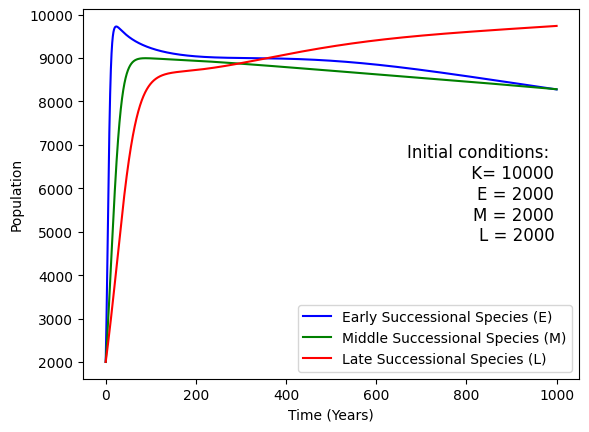

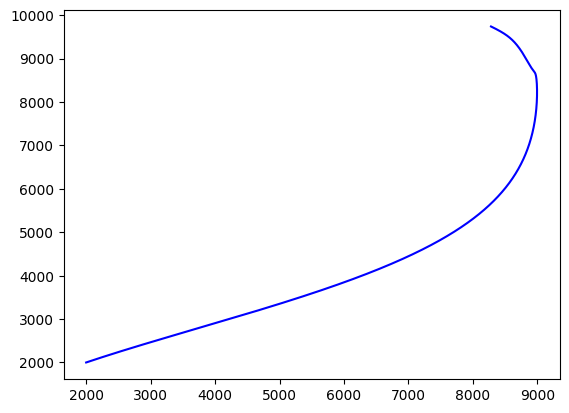

In [ ]:
#Implementing Forest Succession Model (Lotka-Volterra Variant) with time-dependent exclusion rates
""" 
Three species, E, M, and L, for early, mid, and late succesional.
"""

def heun_integrate(odes, init_state_vector, h, sim_length):
    """ 
    Parameters:
    odes: an ordered list of functions accepting a time and a state vector, which represent ordinary differential equations that describing the state variables of a dynamical system in continuous time.
    init_state_vector: an ndarray containing the initial conditions, with variables ordered the same way as the odes
    h: discrete timestep over which the system should be evaluated (in some uniform time unit)
    Returns:
    simulated_values: A nested list of arrays containing the state of each variable at each timestep, in the order that they were given.
    """
    #Calculate the timesteps over the whole length of the simulation
    time_window = np.arange(0, sim_length, h)
    #Initialize output list with initial conditions
    simulated_values = [init_state_vector]
    #Process one step at a time
    for t in time_window:
    #for t in time_window:
        #get the list of states from the last time step
        y=simulated_values[-1]

        #Evaluate each ODE with the previous step's state (uses initial values at t=0), for the current t
        current_slopes = np.array([eq(t, y) for eq in odes])

        #get "eulers prediction" of the state variables 
        euler_pred_states = y + current_slopes*h

        #get the slopes of each state variable at the future state predicted by Euler's method
        euler_slopes = np.array([eq(t+h, euler_pred_states)for eq in odes]) 

        #Average the slopes for the current state of the system with the slopes predicted by euler's method
        mean_slopes = (current_slopes + euler_slopes)/2

        #Add updated states to using the mean slope
        simulated_values.append(y + h*mean_slopes)
    return simulated_values

#Initial Populations
E = 2000
M = 2000
L = 2000

init_state_vector = np.array([E,M,L])

#growth rates (r)
r_E = 0.3
r_M = 0.1
r_L = 0.05
r_vals = np.array([r_E, r_M, r_L])

#Carrying Capacity (K) - single value, represents "how much biomass the ecosystem can hold"
K = 10000
#Initial competition values (rows are effect the given species has on the others(alpha)
a_E = [1, 0.15, 0.15]
a_M = [0.05, 1, 0.1]
a_L = [0.05, 0.1, 1]

#competition matrix
a_matrix = np.array([a_E, a_M, a_L])

#base competition value
bc = 0.1
#Length of simulation
T = 1000
h = 0.01

def update_alpha(a_matrix, t):
    #Update the competition matrix for the given time
    time_frac = t/T
    a = a_matrix.copy()
    for i,j in np.ndindex(a.shape):
        if i==j:
            continue
        elif j==0: #Early-successional species get less competitive over time
            w = (bc+0.5*(1-time_frac))
        elif j==1: #Mid successional species are competitive at mid time frames
            w= (bc+5*(time_frac)*((1-time_frac)**5))
        elif j==2: #late-successional species are competitive in late-stage time frames
            w= (bc+time_frac)
        a[i, j] = a_matrix[i, j] * w
    
    return a
#ODES
def de_dt(t, y):
    cur_matrix = update_alpha(a_matrix, t)
    E, M, L = y
    return r_E*E*(1-((cur_matrix[0,0]* E + cur_matrix[0,1] * M + cur_matrix[0,2] * L)/K)) #Generalized lotka volterra - competitive load for a species over carrying capacity

def dm_dt(t, y):
    cur_matrix = update_alpha(a_matrix, t)
    E, M, L = y
    return r_M*M*(1-((cur_matrix[1,0]* E + cur_matrix[1,1] * M + cur_matrix[1,2] * L)/K))

def dl_dt(t, y):
    cur_matrix = update_alpha(a_matrix, t)
    E, M, L = y
    return r_L*L*(1-((cur_matrix[2,0]* E + cur_matrix[2,1] * M + cur_matrix[2,2] * L)/K))

#list odes
odes = [de_dt, dm_dt, dl_dt]


#simulate with heun
heun_sim = np.array(heun_integrate(odes, init_state_vector, h, sim_length=int(T)))

#calculate time steps
x = np.arange(0, T + h, h)
print(x.shape)
#Plotting
text = f"Initial conditions: \n K= {K}\nE = {E}\nM = {M}\nL = {L}"
#Choose corect set of axes (grid cell)
fig, ax = plt.subplots()
ax.plot(x,heun_sim[:,0], 'b',label='Early Successional Species (E)')
ax.plot(x,heun_sim[:,1], 'g',label='Middle Successional Species (M)')
ax.plot(x,heun_sim[:,2], 'r',label='Late Successional Species (L)')
ax.set_xlabel("Time (Years)")
ax.set_ylabel("Population")
ax.text(0.95, 0.5, text, fontsize=12, color='black', ha='right', va='center', transform=ax.transAxes)
plt.legend()
plt.show()

plt.plot(heun_sim[:,1], heun_sim[:,2], 'b',label='Early')
plt.show()

In [ ]:
#Social Media Engagement Model: